In [1]:
import matplotlib.pyplot as plt
import numpy as np

'''
Geometric Brownian Motion with drift!
u=drift factor
sigma: volatility
T: time span
dt: length of steps
S0: Stock Price in t=0
W: Brownian Motion with Drift N[0,1]
'''


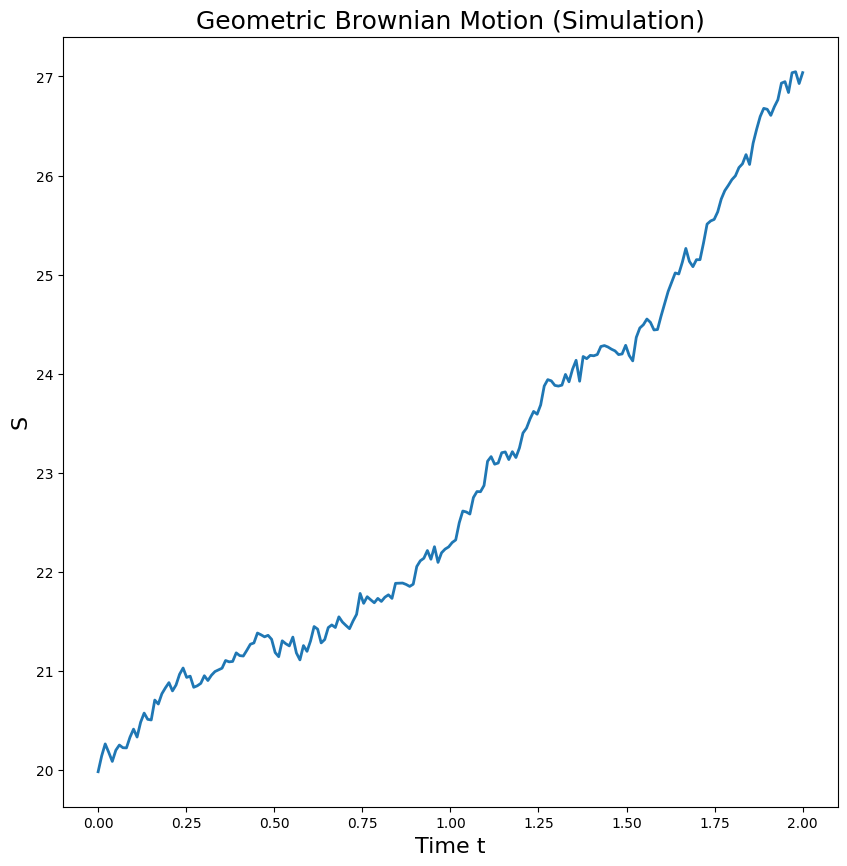

In [3]:
rect = [0.1, 5.0, 0.1, 0.1]
fig = plt.figure(figsize=(10,10))

T = 2
mu = 0.1
sigma = 0.04
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)

#Standare normal distrib
W = np.random.standard_normal(size=N)
W = np.cumsum(W)*np.sqrt(dt)

X = (mu-0.5*sigma**2)*t + sigma * W

#Brownian Motion
S = S0 * np.exp(X)
plt.plot(t,S, lw=2)
plt.xlabel("Time t", fontsize=16)
plt.ylabel("S", fontsize=16)
plt.title("Geometric Brownian Motion (Simulation)",fontsize=18)
plt.show()

The simulating stock prices using Brownian motion is also shown in the following code:


In [5]:
import pylab, random

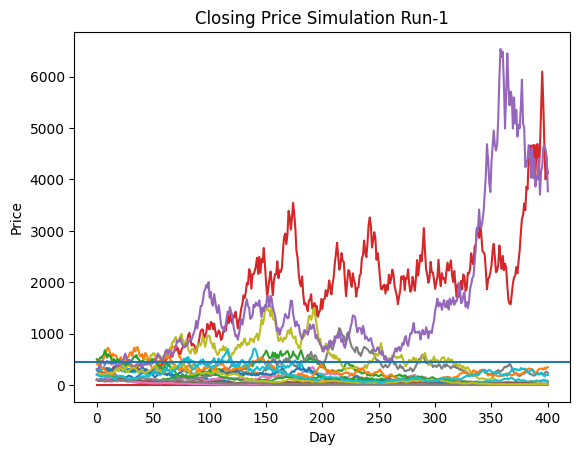

In [7]:
class Stock(object):
    def __init__(self, price, distribution):
        self.price = price
        self.history = [price]
        self.distribution = distribution
        self.lastChange = 0
    
    def setPrice(self, price):
        self.price = price
        self.history.append(price)
        
    def getPrice(self):
        return self.price
    
    def walkIt(self, marketBias, mo):
        oldPrice = self.price
        baseMove = self.distribution() + marketBias
        self.price = self.price * (1.0 + baseMove)
        if mo:
            self.price = self.price + random.gauss(.5, .5) * self.lastChange
        if self.price < 0.01:
            self.price = 0.0
        self.history.append(self.price)
        self.lastChange = oldPrice - self.price
    
    def plotIt(self, figNum):
        pylab.figure(figNum)
        pylab.plot(self.history)
        pylab.title('Closing Price Simulation Run-' + str(figNum))
        pylab.xlabel('Day')
        pylab.ylabel('Price')

def testStockSimulation():
    def runSimulation(stocks, fig, mo):
        mean = 0.0
        for s in stocks:
            for d in range(numDays):
                s.walkIt(bias, mo)
            s.plotIt(fig)
            mean += s.getPrice()
        mean = mean/float(numStocks)
        pylab.axhline(mean)
    numStocks = 20
    numDays = 400
    stocks = []
    bias = 0.0
    mo = False
    startvalues = [100,500,200,300,100,100,100,200,200, 300,300,400,500,0,300,100,100,100,200,200,300]
    for i in range(numStocks):
        volatility = random.uniform(0,0.2)
        d1 = lambda:random.uniform(-volatility, volatility)
        stocks.append(Stock(startvalues[i], d1))
    runSimulation(stocks, 1 ,mo)
testStockSimulation()
pylab.show()

    